<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Classifier_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git pull https://github.com/LarryDCJ/AC_Classifier

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! git config --global user.email "larrydcj@icloud.com"
! git config --global user.name "LarryDCJ"
! git commit -m "colab updates"

On branch master
Changes not staged for commit:
	modified:   Classifier_Conv.ipynb
	deleted:    images/A-10/A-10_08.jpg
	deleted:    images/A-10/A-10_100.jpg
	deleted:    images/A-10/A-10_115.jpg
	deleted:    images/A-10/A-10_128.jpg
	deleted:    images/A-10/A-10_132.jpg
	deleted:    images/A-10/A-10_134.jpg
	deleted:    images/A-10/A-10_135.jpg
	deleted:    images/A-10/A-10_137.jpg
	deleted:    images/A-10/A-10_141.jpg
	deleted:    images/A-10/A-10_145.jpg
	deleted:    images/A-10/A-10_151.jpg
	deleted:    images/A-10/A-10_157.jpg
	deleted:    images/A-10/A-10_165.jpg
	deleted:    images/A-10/A-10_174.jpg
	deleted:    images/A-10/A-10_177.jpg
	deleted:    images/A-10/A-10_178.jpg
	deleted:    images/A-10/A-10_183.jpg
	deleted:    images/A-10/A-10_184.jpg
	deleted:    images/A-10/A-10_187.jpg
	deleted:    images/A-10/A-10_193.jpg
	deleted:    images/A-10/A-10_194.jpg
	deleted:    images/A-10/A-10_198.jpg
	deleted:    images/A-10/A-10_201.jpg
	deleted:    images/A-10/A-10_209.jpg
	delet

In [15]:
!git config --get remote.origin.url

git@github.com:LarryDCJ/AC_Classifier.git


In [13]:
! git push origin master 

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
!git remote set-url origin git@github.com:LarryDCJ/AC_Classifier.git

In [12]:
!git remote -v

origin	git@github.com:LarryDCJ/AC_Classifier.git (fetch)
origin	git@github.com:LarryDCJ/AC_Classifier.git (push)


In [ ]:
!pip install fastbook

In [ ]:
! pip install utils

In [6]:
import re
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pathlib
from IPython.display import Image
from google.colab import drive
import os
from fastai.vision.widgets import *
from utils import *
drive.mount('/content/drive')
config_file = Path("~/.fastai/config.yml").expanduser()

if config_file.exists(): os.remove(config_file)
assert not config_file.exists()
config = Config()
assert config_file.exists()
config['archive_path'] = Path('drive/archive')
config['data_path'] = Path('drive/data')
config['model_path'] = Path('drive/models')
config['storage_path'] = Path('root/tmp')
config.save()

Mounted at /content/drive
{'archive_path': '/root/.fastai/archive', 'data_path': '/root/.fastai/data', 'model_path': '/root/.fastai/models', 'storage_path': '/tmp', 'version': 2}
{'archive_path': 'drive/archive', 'data_path': 'drive/data', 'model_path': 'drive/models', 'storage_path': 'root/tmp', 'version': 2}
Please continue


In [7]:
%cd /content/drive/MyDrive/AC_Classifier

/content/drive/MyDrive/AC_Classifier


In [11]:
path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()
print(f"{len(files)} files to be loaded.")

5591 files to be loaded.


In [ ]:
print(files[0].name)
#def label_func(f): return re.sub("_[^_]+$", "",f) #rename folder based on filename
pat = r'^(.*)_\d+.jpg' #Image Categories from filename

A-10_100.jpg


In [ ]:
dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())

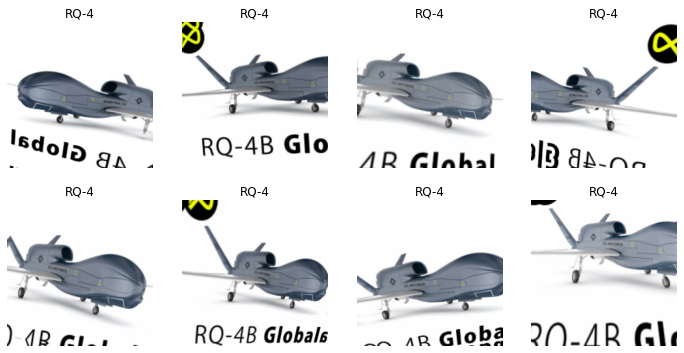

In [ ]:
dls.train.show_batch(max_n=8,nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
  try: cleaner.fns[idx].unlink()
  except: pass

path = Path('/content/drive/MyDrive/AC_Classifier/')
path.ls()
files = get_image_files(path/"images")
print(len(files))

dls = ImageDataLoaders.from_name_re(path,
                                    files,
                                    pat,
                                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                    batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet34, metrics=error_rate)

5591


In [ ]:
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.251475,2.455793,0.654255,11:38


epoch,train_loss,valid_loss,error_rate,time
0,1.767246,1.711340,0.500886,01:01
1,1.281891,1.369168,0.375000,01:01
2,0.832152,1.152858,0.337766,01:01
3,0.595588,1.121083,0.327128,01:01


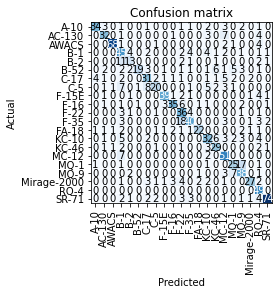

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

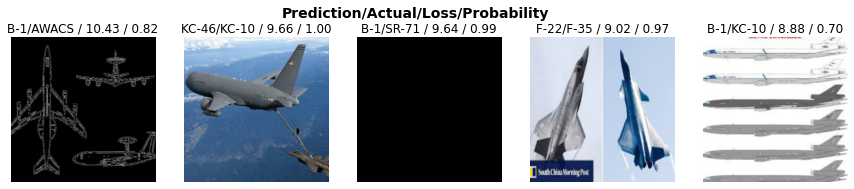

In [ ]:
interp.plot_top_losses(5, nrows=1)

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=3.311311274956097e-06)

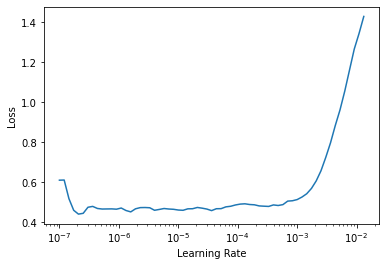

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-5)

epoch,train_loss,valid_loss,error_rate,time


FileNotFoundError: ignored